# Exercise 1

We first load a dataset and examine its dimensions.

In [ ]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np

xy_data = np.load('/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

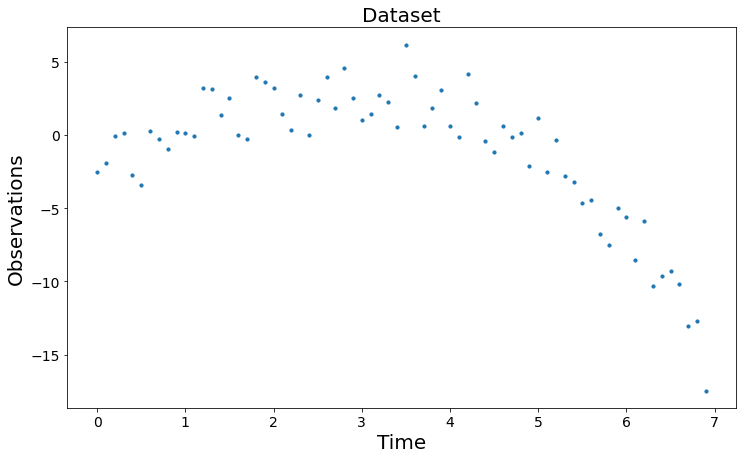

In [ ]:
import matplotlib.pyplot as plt

time = xy_data[:,0]      # First column of array (indexed by 0) contains the dates 
observations = xy_data[:,1]  # Second column of array (indexed by 1) contains the CO2 levels

# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(dates, CO2_levels, s=10)   # s can be used to adjust the size of the dots
plt.xlabel('Time')
plt.ylabel('Observations')
plt.title('Dataset')
plt.savefig('dataset_1.pdf', bbox_inches = 'tight')
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [ ]:
def polyreg(data_matrix, k):
  # Recall that dates = CO2_data_full[:,0], and CO2_levels = CO2_data_full[:,1]
  time = data_matrix[:,0]
  all_ones = np.ones(np.shape(time))
  N = np.shape(data_matrix)[0]
  
  # Create matrix X which contains all ones in first column, and dates in the second
  list = []
  list.append(all_ones)
  if (k<N):
    for i in range(k):
      list.append(time**(i+1))
  elif(k>=N):
    for j in range(N-1):
      list.append(time**(j+1))
    for i in range(N,k):
      list.append(np.zeros(N))
  list = tuple(list)
  X  = np.column_stack(list)
  
  # Defining the y vector
  yvalues = data_matrix [:,1]

  # Computing the optimum coefficient vector beta* using the formula
  XT = X.T  # transpose
  beta_lin =  np.linalg.inv(XT.dot(X)).dot(XT.dot(yvalues))     #can also use the built-in function np.linalg.lstsq

  # Computing the fit of the model
  fit_lin = X.dot(beta_lin)  

  #Compute the residuals
  resid_lin = yvalues - fit_lin
  return beta_lin, fit_lin, resid_lin

Use the tests below to check the outputs of the function you have written:

In [ ]:
# Some tests to make sure your  function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

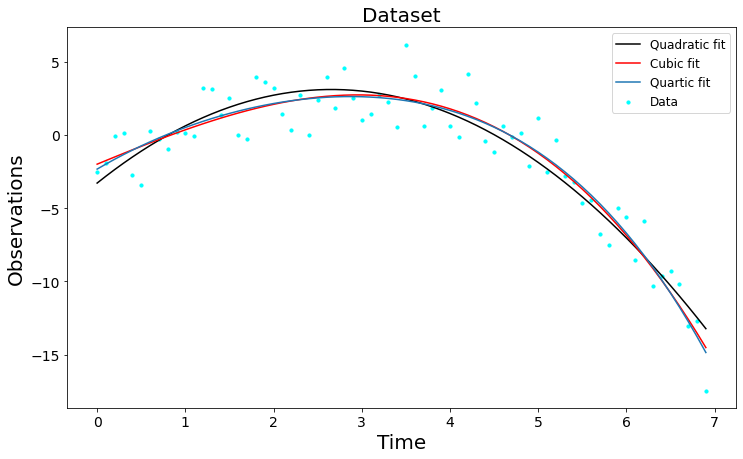

Quadratic SSE and R^2 are: 172.18102528988547 , 0.8876
Cubic SSE and R^2 are: 152.4058048891581 , 0.9005
Quartic SSE and R^2 are: 151.22778969027118 , 0.9013


In [ ]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(time, observations, s=10, color = 'cyan', label = 'Data')   
plt.plot(time, polyreg(xy_data, 2)[1], color = 'black', label = 'Quadratic fit')
plt.plot(time, polyreg(xy_data, 3)[1], color = 'red', label = 'Cubic fit')
plt.plot(time, polyreg(xy_data, 4)[1], label = 'Quartic fit')  
plt.xlabel('Time')
plt.ylabel('Observations')
plt.title('Dataset')
plt.legend(fontsize = 'large')
plt.savefig('Dataset_fits.pdf', bbox = 'tight')
plt.show()

SSE_2 = np.linalg.norm(polyreg(xy_data, 2)[2])**2
SSE_3 = np.linalg.norm(polyreg(xy_data, 3)[2])**2
SSE_4 = np.linalg.norm(polyreg(xy_data, 4)[2])**2
SSE_0 = np.linalg.norm(polyreg(xy_data, 0)[2])**2
R_2= np.round_(1- SSE_2/SSE_0, decimals = 4)
R_3= np.round_(1- SSE_3/SSE_0, decimals = 4)
R_4= np.round_(1- SSE_4/SSE_0, decimals = 4)

print('Quadratic SSE and R^2 are:', SSE_2, ',', R_2 )
print('Cubic SSE and R^2 are:', SSE_3, ',', R_3 )
print('Quartic SSE and R^2 are:', SSE_4, ',', R_4 )

 #### State which model you choose and briefly justify your choice.
 
 
The quartic model is the best one as it has the smallest SSE value. The R^2 value is also the closest to one for the quartic model. 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

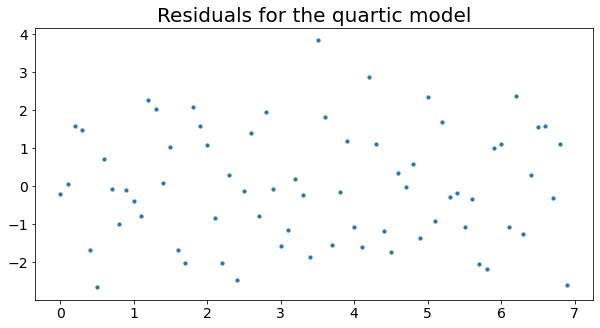

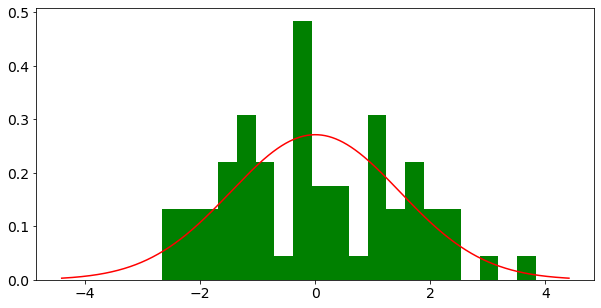

In [ ]:
#Your code here
plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(time, polyreg(xy_data, 4)[2], s=10)
plt.title('Residuals for the quartic model')
plt.savefig('quartic_resid.png', bbox_inches = 'tight')
plt.show()

from scipy.stats import norm
# Plot normed histogram of the residuals
n, bins, patches = plt.hist(polyreg(xy_data, 4)[2], bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
res_quad_stdev = np.std(polyreg(xy_data, 4)[2])  #standard deviation of residuals
xvals = np.linspace(-3*res_quad_stdev,3*res_quad_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_quad_stdev), 'r')
plt.show()
